In [1]:
import numpy as np
import pandas as pd

Rearanjando e limpando os dados:

In [14]:
raw_data = pd.read_csv('data/sem_carga',  sep=", | -> ", names = ["timestamp", "intern_clock", 7, 6, 8, 5, 3, 1, 2, 4], engine = "python")
cols = ["timestamp", "intern_clock", 1, 2, 3, 4, 5, 6, 7, 8]
raw_data = raw_data[cols]
raw_data.drop('intern_clock', inplace=True, axis=1)
raw_data.drop('timestamp', inplace=True, axis=1)
raw_data = raw_data.astype({1:"int", 2:"int", 3:"int", 4:"int", 5:"int", 6:"int", 7:"int", 8:"int"})
raw_data.drop(1, inplace=True, axis=1)
raw_data.drop(2, inplace=True, axis=1)
raw_data.drop(3, inplace=True, axis=1)
raw_data.drop(4, inplace=True, axis=1)
raw_data

,5,6,7,8
0,802141,2337943,-3715136,95644
1,802386,2338088,-3715503,95977
2,802689,2337952,-3715298,96241
3,802900,2337979,-3715180,96393
4,802992,2337956,-3715525,96209
...,...,...,...,...
258,816384,2336708,-3720851,94586
259,816383,2336631,-3721049,94728
260,816097,2336577,-3721211,94485
261,816609,2336239,-3721393,94464


Extraindo médias para fazer "tara" dos sensores.

In [15]:
tara = raw_data.sum()/raw_data.shape[0]
tara

5    8.098834e+05
6    2.337495e+06
7   -3.719232e+06
8    9.581695e+04
dtype: float64

Os valores encontrados na última operação podem ser usados para corrigir os dados recolhidos pelos sensores.

In [27]:
tara.to_csv('data/tara.csv', index = False)

In [28]:
raw_data = pd.read_csv('data/sem_carga',  sep=", | -> ", names = ["timestamp", "intern_clock", 7, 6, 8, 5, 3, 1, 2, 4], engine = "python")
cols = ["timestamp", "intern_clock", 1, 2, 3, 4, 5, 6, 7, 8]
raw_data = raw_data[cols]
raw_data

,timestamp,intern_clock,1,2,3,4,5,6,7,8
0,17:17:34.667,1857096,0,0,0,0,802141,2337943,-3715136,95644
1,17:17:35.665,1858100,0,0,0,0,802386,2338088,-3715503,95977
2,17:17:36.697,1859104,1,1,0,0,802689,2337952,-3715298,96241
3,17:17:37.697,1860108,0,0,0,0,802900,2337979,-3715180,96393
4,17:17:38.696,1861112,0,0,0,0,802992,2337956,-3715525,96209
...,...,...,...,...,...,...,...,...,...,...
258,17:21:53.712,2116124,0,0,0,0,816384,2336708,-3720851,94586
259,17:21:54.708,2117129,0,0,0,0,816383,2336631,-3721049,94728
260,17:21:55.704,2118132,0,1,0,0,816097,2336577,-3721211,94485
261,17:21:56.735,2119137,0,1,0,0,816609,2336239,-3721393,94464


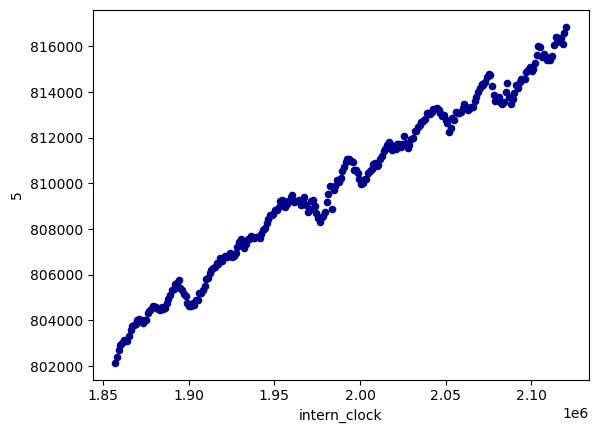

In [24]:
ax1 = raw_data.plot.scatter(x='intern_clock',
                      y=5,
                      c='DarkBlue')